In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
from itertools import chain
%matplotlib inline

In [2]:
campaign_desc = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/campaign_desc.csv')

In [3]:
campaign_table = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/campaign_table.csv')

In [4]:
causal_data = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/causal_data.csv')

In [5]:
coupon = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/coupon.csv')

In [6]:
coupon_redempt = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/coupon_redempt.csv')

In [7]:
hh_demographic = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/hh_demographic.csv')

In [8]:
product = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/product.csv')

In [9]:
transaction_data = pd.read_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/transaction_data.csv')

In [10]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
DESCRIPTION    30 non-null object
CAMPAIGN       30 non-null int64
START_DAY      30 non-null int64
END_DAY        30 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [13]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
DESCRIPTION      7208 non-null object
household_key    7208 non-null int64
CAMPAIGN         7208 non-null int64
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


In [14]:
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
PRODUCT_ID    int64
STORE_ID      int64
WEEK_NO       int64
display       object
mailer        object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


In [15]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
COUPON_UPC    124548 non-null int64
PRODUCT_ID    124548 non-null int64
CAMPAIGN      124548 non-null int64
dtypes: int64(3)
memory usage: 2.9 MB


In [16]:
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
household_key    2318 non-null int64
DAY              2318 non-null int64
COUPON_UPC       2318 non-null int64
CAMPAIGN         2318 non-null int64
dtypes: int64(4)
memory usage: 72.6 KB


In [17]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
AGE_DESC               801 non-null object
MARITAL_STATUS_CODE    801 non-null object
INCOME_DESC            801 non-null object
HOMEOWNER_DESC         801 non-null object
HH_COMP_DESC           801 non-null object
HOUSEHOLD_SIZE_DESC    801 non-null object
KID_CATEGORY_DESC      801 non-null object
household_key          801 non-null int64
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [18]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
PRODUCT_ID              92353 non-null int64
MANUFACTURER            92353 non-null int64
DEPARTMENT              92353 non-null object
BRAND                   92353 non-null object
COMMODITY_DESC          92353 non-null object
SUB_COMMODITY_DESC      92353 non-null object
CURR_SIZE_OF_PRODUCT    92353 non-null object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


In [19]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
household_key        int64
BASKET_ID            int64
DAY                  int64
PRODUCT_ID           int64
QUANTITY             int64
SALES_VALUE          float64
STORE_ID             int64
RETAIL_DISC          float64
TRANS_TIME           int64
WEEK_NO              int64
COUPON_DISC          float64
COUPON_MATCH_DISC    float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


In [20]:
campaign_desc = campaign_desc.dropna()
campaign_table = campaign_table.dropna()
causal_data = causal_data.dropna()
coupon = coupon.dropna()
coupon_redempt = coupon_redempt.dropna()
hh_demographic = hh_demographic.dropna()
product = product.dropna()
transaction_data = transaction_data.dropna()

In [74]:
product['DEPARTMENT'].replace(' ', np.nan, inplace=True)

In [76]:
product.dropna(subset=['DEPARTMENT'], inplace=True)

## 1. EXPLORATORY DATA ANALYSIS

### TRANSACTION SUMMARY

In [10]:
buyers = transaction_data.groupby('household_key').agg({'SALES_VALUE': 'sum','PRODUCT_ID': 'count','BASKET_ID': 'nunique'})
buyers.columns = ['tot_spend','num_prods','trips']
buyers.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tot_spend,2500.0,3222.985232,3349.026076,8.17,970.74,2157.75,4413.32,38319.79
num_prods,2500.0,1038.292800,999.097354,4.00,325.00,734.00,1454.50,6851.00
trips,2500.0,110.593600,115.669368,1.00,39.00,79.00,142.25,1300.00


From the above table we see that over the two-year period, the average consumer:

spent a total $3,223
purchased 1,038 products
visited the supermarket 111 times

In [30]:
product.PRODUCT_ID.nunique()

92353

There are 92353 products offered by the retailer across all its stores

In [31]:
transaction_data.PRODUCT_ID.nunique()

92339

Out of the 92353 products, 92339 have been bought by customers over a 2 year period

In [32]:
causal_data.PRODUCT_ID.nunique()

68377

The various stores have promoted 68377 products via mailers or different display options in the store

In [33]:
coupon.PRODUCT_ID.nunique()

44133

As part of the store campaigns, 44133 products have been promoted

In [34]:
transaction_data.household_key.nunique()

2500

There are 2500 different households who have purchased from the retailer over a 2 year period

In [35]:
product.DEPARTMENT.nunique()

44

The 92353 different products offered by the retailer can be categorised under 44 product departments

In [28]:
hh_demographic.household_key.nunique()

801

The retailer has demographic information for 801 households out of the 2500 households purchasing from their stores

In [38]:
campaign_desc.CAMPAIGN.nunique()

30

The stores promoted a total of 30 campaigns

In [40]:
coupon.COUPON_UPC.nunique()

1135

As part of the 30 campaigns run by the store, 1135 coupons were distributed to different households

In [36]:
campaign_table.household_key.nunique()

1584

The 30 different store campaigns was promoted to a total of 1584 households 

In [88]:
coupon_redempt.household_key.nunique()

556

434 out of the 1584 households actually redeemed the coupons given by the stores

### COUPONS PER CAMPAIGN

In [89]:
c1 = coupon.groupby(by=['CAMPAIGN']).agg({'COUPON_UPC': 'nunique'})
c1.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/c1.csv')
c1.head()

,COUPON_UPC
CAMPAIGN,
1,11
2,16
3,34
4,12
5,11


### COUPONS REDEEMED PER CAMPAIGN

In [90]:
c2 = coupon_redempt.groupby(by=['CAMPAIGN']).agg({'COUPON_UPC': 'nunique'})
c2.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/c2.csv')
c2.head()

,COUPON_UPC
CAMPAIGN,
1,1
2,4
3,2
4,6
5,5


### DEPARTMENT-WISE SALES & TRANSACTIONS

In [43]:
merge = transaction_data.merge(product, on=['PRODUCT_ID'], how='inner')

In [44]:
merge.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,1929,27021022215,4,1004906,1,1.39,441,-0.6,1755,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
2,568,27021090189,4,1004906,1,1.39,446,-0.6,35,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
3,887,27031467254,5,1004906,1,1.39,298,-0.6,1551,1,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
4,175,27057508267,7,1004906,1,1.99,446,0.0,2303,2,0.0,0.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB


In [45]:
department_sales = merge.groupby('DEPARTMENT')['SALES_VALUE'].agg(['sum','count'])
department_sales.columns = ['Total Sales','Total Transactions']

In [46]:
department_sales.head()

,Total Sales,Total Transactions
DEPARTMENT,,
,0.00,7839
AUTOMOTIVE,452.66,65
CHARITABLE CONT,7.74,2
CHEF SHOPPE,2290.80,766
CNTRL/STORE SUP,49.05,21


In [88]:
department_sales.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/DepartmentalTXs.csv')

In [123]:
department_sales_count = merge.groupby(by=['DEPARTMENT']).count()['PRODUCT_ID'].sort_values(ascending=False)
department_sales_count

DEPARTMENT
GROCERY            1646076
DRUG GM             277232
PRODUCE             257290
MEAT-PCKGD          111957
MEAT                 88416
DELI                 62787
PASTRY               38179
NUTRITION            32164
KIOSK-GAS            22059
SEAFOOD-PCKGD        11216
SALAD BAR             9516
                      7839
COSMETICS             7692
MISC SALES TRAN       6050
FLORAL                4524
SEAFOOD               4093
MISC. TRANS.          2351
SPIRITS               2119
TRAVEL & LEISUR        862
COUP/STR & MFG         817
CHEF SHOPPE            766
GARDEN CENTER          720
RESTAURANT             465
FROZEN GROCERY         251
AUTOMOTIVE              65
DAIRY DELI              53
GM MERCH EXP            49
CNTRL/STORE SUP         21
POSTAL CENTER           20
PHOTO                   17
RX                      14
DELI/SNACK BAR          11
MEAT-WHSE                6
PHARMACY SUPPLY          6
TOYS                     5
VIDEO RENTAL             5
HBC              

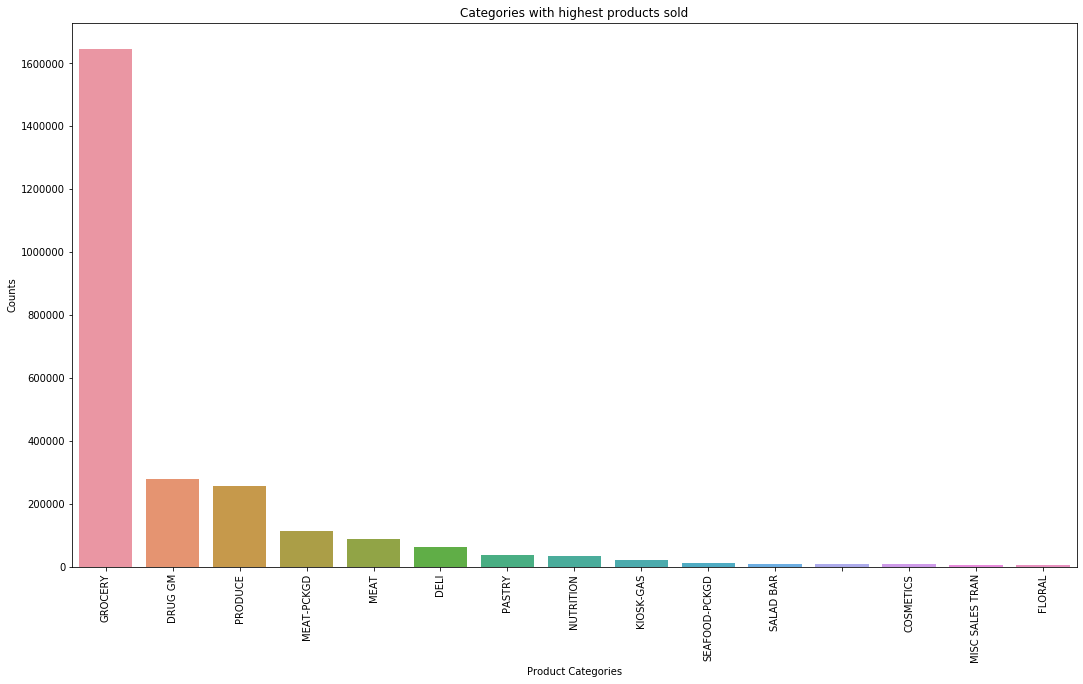

In [125]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
sns.barplot(department_sales_count.iloc[0:15].index,
            department_sales_count.iloc[0:15].values,
            ax = ax)
ax.set_ylabel("Counts")
ax.set_xlabel("Product Categories")
ax.set_title("Categories with highest products sold");
plt.xticks(rotation=90);

In [121]:
department_sales = merge.groupby(by=['DEPARTMENT']).sum()['SALES_VALUE'].sort_values(ascending=False)
department_sales

DEPARTMENT
GROCERY            4.093814e+06
DRUG GM            1.055358e+06
PRODUCE            5.574521e+05
MEAT               5.487868e+05
KIOSK-GAS          5.442223e+05
MEAT-PCKGD         4.124368e+05
DELI               2.608665e+05
PASTRY             1.217399e+05
MISC SALES TRAN    1.199600e+05
NUTRITION          9.766904e+04
SEAFOOD-PCKGD      6.309362e+04
FLORAL             3.965334e+04
COSMETICS          3.236037e+04
SALAD BAR          3.095330e+04
SEAFOOD            2.949692e+04
SPIRITS            2.167088e+04
MISC. TRANS.       1.067869e+04
GARDEN CENTER      7.667820e+03
TRAVEL & LEISUR    2.550380e+03
CHEF SHOPPE        2.290800e+03
RESTAURANT         1.986760e+03
COUP/STR & MFG     1.027720e+03
FROZEN GROCERY     6.532600e+02
AUTOMOTIVE         4.526600e+02
RX                 1.595600e+02
GM MERCH EXP       1.011000e+02
DAIRY DELI         7.323000e+01
CNTRL/STORE SUP    4.905000e+01
PHOTO              4.140000e+01
DELI/SNACK BAR     3.608000e+01
VIDEO              3.477000e+

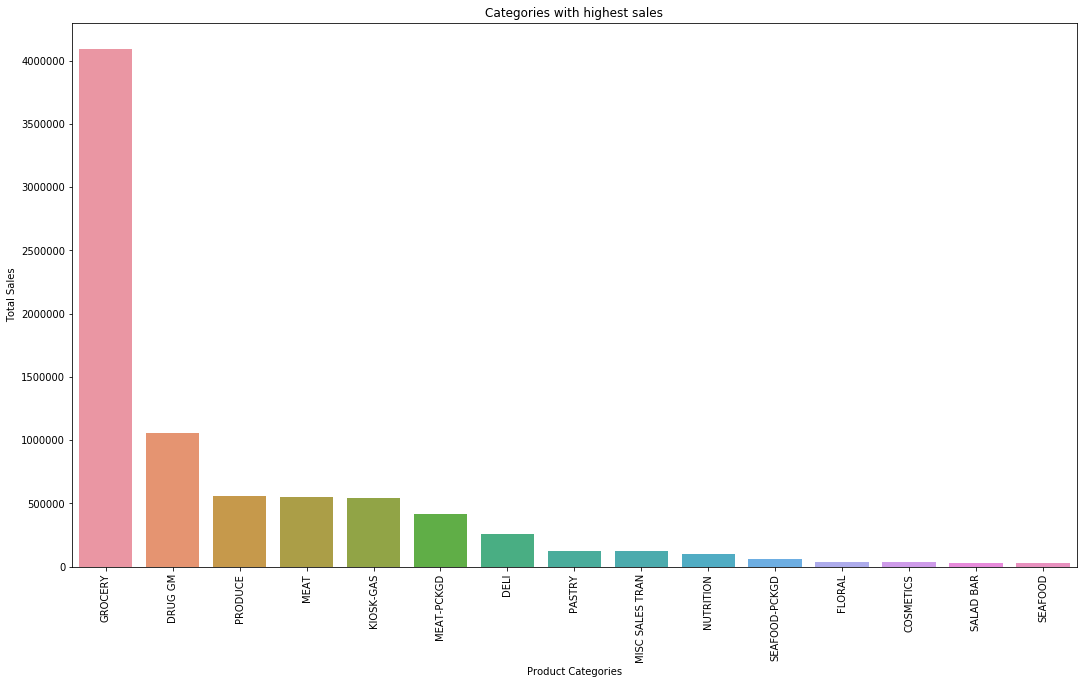

In [127]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
sns.barplot(department_sales.iloc[0:15].index,
            department_sales.iloc[0:15].values,
            ax = ax)
ax.set_ylabel("Total Sales")
ax.set_xlabel("Product Categories")
ax.set_title("Categories with highest sales");
plt.xticks(rotation=90);

### STORE-WISE REVENUE & MARKETING SPENDS

In [34]:
import datetime

li = []
for d in transaction_data['DAY']:
    dt = datetime.datetime(2018, 1, 1) + datetime.timedelta(d - 1)
    li.append(dt)

In [35]:
transaction_data['TRANSACTION_DATE'] = li

In [33]:
spends = transaction_data['RETAIL_DISC'] + transaction_data['COUPON_MATCH_DISC'] 

In [34]:
transaction_data['MARKETING_SPENDS'] = spends

In [15]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TRANSACTION_DATE,MARKETING_SPENDS
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2018-01-01,-0.60
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2018-01-01,0.00
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2018-01-01,-0.30
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2018-01-01,0.00
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2018-01-01,-0.39


In [67]:
revenue_spends = transaction_data[['STORE_ID','SALES_VALUE','COUPON_MATCH_DISC']]
revenue_spends.columns = ['Store','Total Revenue','Marketing Spends']
revenue_spends.head()

,Store,Total Revenue,Marketing Spends
0,364,1.39,0.0
1,364,0.82,0.0
2,364,0.99,0.0
3,364,1.21,0.0
4,364,1.50,0.0


In [73]:
earnings = revenue_spends.groupby('Store').sum()
earnings['Marketing Spends'] = abs(earnings['Marketing Spends'])
earnings

,Total Revenue,Marketing Spends
Store,,
1,29.89,0.0
2,22.06,0.0
12,12.06,0.0
19,28.49,0.0
20,20.00,0.0
...,...,...
34011,43748.76,32.5
34016,12.88,0.0
34037,2320.84,0.9


In [75]:
earnings.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/StoreSalesNumbers.csv')

In [40]:
tp = transaction_data.merge(product, on=['PRODUCT_ID'], how='inner')
tp = tp.groupby('SUB_COMMODITY_DESC').agg({'PRODUCT_ID': 'count','SALES_VALUE': 'sum','MARKETING_SPENDS': 'sum'})
tp.columns = ['TransactionCount','Revenue','Spend']
tp.head()

,TransactionCount,Revenue,Spend
SUB_COMMODITY_DESC,,,
,7839,0.00,0.00
*ATH ACCES:TOWEL BARS/SOAP D,1,4.99,0.00
*ATTERIES:CAMERA/FLASH/WATCH,2,13.98,0.00
*BOYS/GIRLS MISC TOYS,19,123.55,-66.78
*GOURMET/UPSCALE,1,0.00,0.00


In [ ]:
tp.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/ProductNumbers.csv')

## 2. COUPON EFFECTIVENESS

In [92]:
#merge product descriptions with coupon data
coups = coupon.merge(product, on=['PRODUCT_ID'], how='inner')

#add coupon and product information to transaction data, keep only transaction data where a coupon could be used
coup_trans = coups.merge(transaction_data, on=['PRODUCT_ID'], how='inner')

#merge coupon-transaction data with redeemed coupons, creating a data frame with transaction and product info for all coupon transactions
redeem = coupon_redempt.merge(coup_trans, on=['household_key','DAY','COUPON_UPC','CAMPAIGN'], how='inner')

#some observations have a $0 discount in both `COUPON_DISC` and `RETAIL_DISC` - we can assume a coupon was not actually used in this case, so I filtered these observations out
#redeem = redeem.groupby('household_key','DAY','COUPON_UPC')
redeem = redeem[(redeem['COUPON_DISC'] != 0) | (redeem['RETAIL_DISC'] != 0)]

In [93]:
redeem.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,...,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,CUSTOMER_PAID,TRANSACTION_DATE
1,1,421,10000085364,8,5577022,1194,GROCERY,National,REFRGRATD JUICES/DRNKS,DAIRY CASE 100% PURE JUICE - O,...,1,3.39,436,-0.30,1559,61,0.0,0.0,3.39,2019-02-25
2,1,421,10000085364,8,995242,69,GROCERY,Private,FLUID MILK PRODUCTS,FLUID MILK WHITE ONLY,...,1,1.00,436,-0.89,1559,61,0.0,0.0,1.00,2019-02-25
3,1,421,51700010076,8,6391068,213,DRUG GM,National,SOAP - LIQUID & BAR,LIQUID SOAP,...,1,3.00,436,-2.99,1559,61,-1.0,0.0,2.00,2019-02-25
4,1,421,51700010076,8,6391068,213,DRUG GM,National,SOAP - LIQUID & BAR,LIQUID SOAP,...,1,3.00,436,-2.99,1559,61,-1.0,0.0,2.00,2019-02-25
5,1,427,54200000033,8,9655212,1011,GROCERY,National,PAPER HOUSEWARES,DESIGNER PAPER: MEDIUM WEIGHT,...,2,6.78,436,-0.60,1316,62,-1.0,0.0,5.78,2019-03-03


In [94]:
#merge our redeemed coupon data with all transactions
redeem['coupon'] = 'yes'
temp = transaction_data.merge(product, how='outer')
redeem = redeem.merge(temp, how='outer')
redeem['COUPON_UPC'] = redeem['COUPON_UPC'].fillna(0)
redeem['coupon'].replace(np.nan, 'no', inplace=True)
redeem['coup_used'] = np.where(redeem['coupon']=='yes', 1, 0)

#create variable (`num_coups_used_per_prod`) that shows the number of coupons used on individual products over time - this will help us determine if a coupon was used to buy a product for the first time
redeem['num_coups_used_per_prod'] = redeem.sort_values('DAY').groupby(['household_key','PRODUCT_ID','COUPON_UPC'], group_keys=False).transform('cumsum')['coup_used']

#create variable (`num_prods_bought`) that shows the cumulative number of individual products bought over time, and another variable (`first_purchase`) that indicates if the transaction was the first time the customer bought that product
redeem['dummy'] = 1
redeem['num_prods_bought'] = redeem.sort_values('DAY').groupby(['household_key','PRODUCT_ID'], group_keys=False).transform('cumsum')['dummy']
redeem['first_purchase'] = np.where(redeem['num_prods_bought']==1, 1, 0)

#create variable (`first_purch_w_coup`) that indicates if the product was first purchased with a coupon
redeem['first_purch_w_coup'] = np.where((redeem['first_purchase']==1) & (redeem['num_coups_used_per_prod']==1), 1, 0)

#out of all redeemed coupons, summarize first purchases
redeem2 = redeem[redeem['coupon'] == 'yes'].groupby('first_purch_w_coup').agg({'first_purch_w_coup': 'count'})
redeem2.columns = ['total']
redeem2['percent'] = round(redeem2['total']/sum(redeem2['total']),3)*100

In [95]:
redeem2

,total,percent
first_purch_w_coup,,
0,2011,61.5
1,1260,38.5


About 38.5% of coupons were used to buy an unfamiliar product - a very good sign for manufacturers.

In [96]:
#create data frame that only includes the household numbers of coupon users
def addc(x):
    x['coup_user'] = 'yes'
    return x

coupon_users = coupon_redempt.groupby('household_key').apply(addc)

#summarize total household spending
test = transaction_data.groupby('household_key').agg({'SALES_VALUE': 'sum'})
test.columns = ['tot_spend']

#merge total spending with coupon user info
test = test.merge(coupon_users, on=['household_key'], how='outer')

#define non-users
test['coup_user'].replace(np.nan, 'no', inplace=True)

#split data frame into subsets of users and non-users
test_user = test[test['coup_user'] == 'yes']
test_nonuser = test[test['coup_user'] == 'no']

In [97]:
household_spends = test[['household_key','tot_spend','COUPON_UPC','coup_user']]
hs = household_spends.groupby(['household_key','tot_spend','coup_user']).agg({'COUPON_UPC': 'count'})
hs.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/HouseholdSpending.csv')

In [98]:
#summarize store trips by households
trips = transaction_data.groupby('household_key').agg({'BASKET_ID': 'nunique'})
test_user = test_user.merge(trips, on=['household_key'], how='inner')
test_nonuser = test_nonuser.merge(trips, on=['household_key'], how='inner')
test = test.merge(trips, on=['household_key'], how='inner')

test.head()

,household_key,tot_spend,DAY,COUPON_UPC,CAMPAIGN,coup_user,BASKET_ID
0,1,4330.16,421.0,1.000009e+10,8.0,yes,86
1,1,4330.16,421.0,5.170001e+10,8.0,yes,86
2,1,4330.16,427.0,5.420000e+10,8.0,yes,86
3,1,4330.16,597.0,1.000009e+10,18.0,yes,86
4,1,4330.16,597.0,5.420003e+10,18.0,yes,86


In [102]:
household_trips = test[['household_key','BASKET_ID','COUPON_UPC','coup_user']]
ht = household_trips.groupby(['household_key','BASKET_ID','coup_user']).agg({'COUPON_UPC': 'count'})
ht.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/HouseholdTrips.csv')

## 3. INCOME-PURCHASE BEHAVIOUR

In [21]:
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [28]:
income = hh_demographic[['household_key','INCOME_DESC']]
income.head()

,household_key,INCOME_DESC
0,1,35-49K
1,7,50-74K
2,8,25-34K
3,13,75-99K
4,16,50-74K


In [23]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,CUSTOMER_PAID
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,1.39
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.99
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.50


In [24]:
transaction_data['CUSTOMER_PAID'] = transaction_data['SALES_VALUE'] + transaction_data['COUPON_DISC']
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,CUSTOMER_PAID
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,1.39
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.99
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.50


In [25]:
customer = transaction_data.groupby('household_key').agg({'CUSTOMER_PAID': 'sum'})
customer.head()

,CUSTOMER_PAID
household_key,
1,4249.60
2,1945.34
3,2592.02
4,1197.61
5,779.06


In [87]:
custinc = income.merge(customer, on=['household_key'], how='inner')
custinc.sort_values('CUSTOMER_PAID', ascending=False).head(10)

,household_key,INCOME_DESC,CUSTOMER_PAID
517,1609,125-149K,27781.20
745,2322,175-199K,23593.02
470,1453,125-149K,21565.43
463,1430,35-49K,20298.49
235,707,100-124K,19179.82
526,1653,Under 15K,19115.97
241,718,25-34K,18958.96
331,982,35-49K,18583.98
139,400,150-174K,18382.42
405,1229,150-174K,18272.01


In [31]:
custinc.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/IncomePurchase.csv')

## 4. CAUSAL DATA - SALES ANALYSIS

In [10]:
causal_data.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [11]:
display = causal_data[['STORE_ID','display','PRODUCT_ID']]
display.head()

,STORE_ID,display,PRODUCT_ID
0,286,0,26190
1,288,0,26190
2,289,0,26190
3,292,0,26190
4,293,0,26190


In [12]:
causal_data.groupby(['STORE_ID','display']).agg({'PRODUCT_ID': 'nunique'})

PRODUCT_ID
STORE_ID display            
286      0             19510
         1              3009
         2              2656
         3              1514
         4                16
...                      ...
34280    5               569
         6              1756
         7              3149
         9               744
         A               576

[1136 rows x 1 columns]

In [13]:
mailer = causal_data[['STORE_ID','mailer','PRODUCT_ID']]
mailer.head()

,STORE_ID,mailer,PRODUCT_ID
0,286,A,26190
1,288,A,26190
2,289,A,26190
3,292,A,26190
4,293,A,26190


In [14]:
causal_data.groupby(['STORE_ID','mailer']).agg({'PRODUCT_ID': 'nunique'})

PRODUCT_ID
STORE_ID mailer            
286      0             5798
         A            17818
         C             1176
         D             5569
         F             2001
...                     ...
34280    H             3136
         J              911
         L              197
         X              282
         Z               90

[1244 rows x 1 columns]

In [15]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [16]:
tx = transaction_data[['STORE_ID','PRODUCT_ID','SALES_VALUE']]
tx.head()

,STORE_ID,PRODUCT_ID,SALES_VALUE
0,364,1004906,1.39
1,364,1033142,0.82
2,364,1036325,0.99
3,364,1082185,1.21
4,364,8160430,1.50


In [17]:
transaction_data.groupby('STORE_ID').agg({'PRODUCT_ID': 'count'})

,PRODUCT_ID
STORE_ID,
1,4
2,5
12,4
19,8
20,2
...,...
34011,12210
34016,5
34037,797


In [18]:
display_transaction = display.merge(tx, on=['STORE_ID','PRODUCT_ID'], how='inner')
display_transaction.head()

,STORE_ID,display,PRODUCT_ID,SALES_VALUE
0,309,7,818980,0.69
1,309,7,818980,1.58
2,309,7,818980,1.58
3,309,7,818980,0.67
4,309,7,818980,0.69


In [25]:
dt = display_transaction.groupby(['STORE_ID','display']).agg({'SALES_VALUE': 'sum'})
dt.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/DisplaySales.csv')
dt

SALES_VALUE
STORE_ID display             
286      0          110792.90
         1            6766.68
         2           13573.37
         3            5165.82
         4               2.00
...                       ...
34280    5            1272.62
         6            3904.99
         7            5411.87
         9            2203.69
         A             847.80

[1132 rows x 1 columns]

In [20]:
mailer_transaction = mailer.merge(tx, on=['STORE_ID','PRODUCT_ID'], how='inner')
mailer_transaction.head()

,STORE_ID,mailer,PRODUCT_ID,SALES_VALUE
0,309,0,818980,0.69
1,309,0,818980,1.58
2,309,0,818980,1.58
3,309,0,818980,0.67
4,309,0,818980,0.69


In [26]:
mt = mailer_transaction.groupby(['STORE_ID','mailer']).agg({'SALES_VALUE': 'sum'})
mt.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/MailerSales.csv')
mt

SALES_VALUE
STORE_ID mailer             
286      0          22434.94
         A          65827.60
         C           1715.45
         D          45046.55
         F           8917.47
...                      ...
34280    H           2948.06
         J            955.36
         L            490.81
         X           1118.12
         Z             54.87

[1155 rows x 1 columns]

## 5. RFM ANALYSIS

In [61]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,CUSTOMER_PAID,TRANSACTION_DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,1.39,2018-01-01
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,0.82,2018-01-01
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,0.99,2018-01-01
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1.21,2018-01-01
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1.50,2018-01-01


In [62]:
transaction_data['TRANSACTION_DATE'].min()

Timestamp('2018-01-01 00:00:00')

In [63]:
transaction_data['TRANSACTION_DATE'].max()

Timestamp('2019-12-12 00:00:00')

In [64]:
import datetime as dt
NOW = dt.datetime(2019,12,13)

### STEP 1: Create a RFM table by calculating RFM metrics for each household

In [74]:
rfmTable = transaction_data.groupby('household_key').agg({'TRANSACTION_DATE': lambda x: (NOW - x.max()).days, 'BASKET_ID': lambda x: len(x), 'CUSTOMER_PAID': lambda x: x.sum()})
rfmTable['TRANSACTION_DATE'] = rfmTable['TRANSACTION_DATE'].astype(int)
rfmTable.rename(columns={'TRANSACTION_DATE': 'recency', 
                         'BASKET_ID': 'frequency', 
                         'CUSTOMER_PAID': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
household_key,,,
1,6,1727,4249.60
2,44,714,1945.34
3,9,922,2592.02
4,85,301,1197.61
5,9,222,779.06


### STEP 2: Split the metrics

In [81]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 2.0, 0.5: 7.0, 0.75: 21.0},
 'frequency': {0.25: 325.0, 0.5: 734.0, 0.75: 1454.5},
 'monetary_value': {0.25: 965.1275, 0.5: 2149.1150000000002, 0.75: 4392.99},
 'r_segment': {0.25: 1.0, 0.5: 2.0, 0.75: 3.0},
 'f_segment': {0.25: 1.75, 0.5: 3.0, 0.75: 4.0},
 'm_segment': {0.25: 1.75, 0.5: 2.5, 0.75: 3.25}}

### STEP 3: Create a segmented RFM table by calculating Recency, Frequency and Monetary score

The lowest recency, highest frequency and monetary amounts are our best customers.

In [76]:
segmented_rfm = rfmTable

In [77]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

We'll now add the segment numbers to the newly created segmented RFM table

In [78]:
segmented_rfm['r_segment'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_segment'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_segment'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_segment,f_segment,m_segment
household_key,,,,,,
1,6,1727,4249.60,2,1,2
2,44,714,1945.34,4,3,3
3,9,922,2592.02,3,2,2
4,85,301,1197.61,4,4,3
5,9,222,779.06,3,4,4


Let's add a new column to combine RFM score: 111 is the highest score 

In [79]:
segmented_rfm['RFMClass'] = segmented_rfm.r_segment.map(str) + segmented_rfm.f_segment.map(str) + segmented_rfm.m_segment.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_segment,f_segment,m_segment,RFMClass
household_key,,,,,,,
1,6,1727,4249.60,2,1,2,212
2,44,714,1945.34,4,3,3,433
3,9,922,2592.02,3,2,2,322
4,85,301,1197.61,4,4,3,443
5,9,222,779.06,3,4,4,344


To see the top 10 customers, we'll filter the data based on RFM score of 111

In [80]:
segmented_rfm[segmented_rfm['RFMClass']=='111'].sort_values('monetary_value', ascending=False).head(10)

,recency,frequency,monetary_value,r_segment,f_segment,m_segment,RFMClass
household_key,,,,,,,
1023,2,4403,38240.65,1,1,1,111
1609,1,6625,27781.20,1,1,1,111
2322,1,5692,23593.02,1,1,1,111
1453,2,6561,21565.43,1,1,1,111
1430,1,5372,20298.49,1,1,1,111
707,1,4310,19179.82,1,1,1,111
1653,2,5347,19115.97,1,1,1,111
982,2,5806,18583.98,1,1,1,111
400,1,4678,18382.42,1,1,1,111


Reference: https://www.blastanalytics.com/blog/rfm-analysis-boosts-sales

## 6. COHORT ANALYSIS - CUSTOMER RETENTION

In [33]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,TRANSACTION_DATE
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,2018-01-01
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,2018-01-01
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,2018-01-01
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,2018-01-01
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,2018-01-01


In [12]:
n_orders = transaction_data.groupby(['household_key'])['BASKET_ID'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / transaction_data['household_key'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

99.88% of customers ordered more than once.


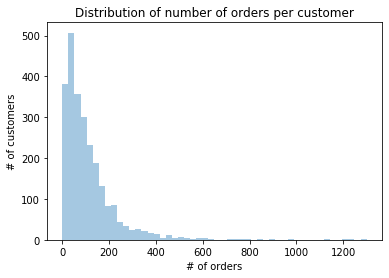

In [20]:
ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

In [24]:
df = transaction_data[['household_key', 'BASKET_ID', 'TRANSACTION_DATE']].drop_duplicates()
df.head()

,household_key,BASKET_ID,TRANSACTION_DATE
0,2375,26984851472,2018-01-01
5,2375,26984851516,2018-01-01
11,1364,26984896261,2018-01-01
16,1130,26984905972,2018-01-01
21,1173,26984945254,2018-01-01


In [36]:
df['order_month'] = df['TRANSACTION_DATE'].dt.to_period('M')
df['cohort'] = df.groupby('household_key')['TRANSACTION_DATE'] \
                 .transform('min') \
                 .dt.to_period('M') 
df.head()

,household_key,BASKET_ID,TRANSACTION_DATE,order_month,cohort
0,2375,26984851472,2018-01-01,2018-01,2018-01
5,2375,26984851516,2018-01-01,2018-01,2018-01
11,1364,26984896261,2018-01-01,2018-01,2018-01
16,1130,26984905972,2018-01-01,2018-01,2018-01
21,1173,26984945254,2018-01-01,2018-01,2018-01


In [45]:
from operator import attrgetter

df_cohort = df.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('household_key', 'nunique')) \
              .reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
df_cohort.head()

,cohort,order_month,n_customers,period_number
0,2018-01,2018-01,540,0
1,2018-01,2018-02,435,1
2,2018-01,2018-03,430,2
3,2018-01,2018-04,425,3
4,2018-01,2018-05,429,4


In [48]:
cohort_pivot = df_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,540.0,435.0,430.0,425.0,429.0,435.0,438.0,435.0,436.0,433.0,...,426.0,445.0,439.0,442.0,440.0,461.0,444.0,452.0,442.0,351.0
2018-02,508.0,422.0,418.0,407.0,404.0,397.0,416.0,401.0,410.0,404.0,...,409.0,430.0,409.0,411.0,418.0,405.0,415.0,399.0,310.0,NaN
2018-03,714.0,573.0,571.0,566.0,571.0,565.0,575.0,564.0,561.0,569.0,...,598.0,575.0,580.0,594.0,575.0,584.0,597.0,451.0,NaN,NaN
2018-04,729.0,600.0,597.0,586.0,589.0,597.0,602.0,581.0,578.0,584.0,...,590.0,595.0,613.0,594.0,610.0,600.0,482.0,NaN,NaN,NaN
2018-05,2.0,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2018-06,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2018-07,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
cohort_pivot.to_csv('C:/NEU/Courses/Summer/Assignment/Assignment1/dunnhumby_The-Complete-Journey/CustomerRetention.csv')

In [49]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
cohort,,,,,,,,,,,,,,,,,,,,,
2018-01,1.0,0.805556,0.796296,0.787037,0.794444,0.805556,0.811111,0.805556,0.807407,0.801852,...,0.788889,0.824074,0.812963,0.818519,0.814815,0.853704,0.822222,0.837037,0.818519,0.65
2018-02,1.0,0.830709,0.822835,0.801181,0.795276,0.781496,0.818898,0.789370,0.807087,0.795276,...,0.805118,0.846457,0.805118,0.809055,0.822835,0.797244,0.816929,0.785433,0.610236,NaN
2018-03,1.0,0.802521,0.799720,0.792717,0.799720,0.791317,0.805322,0.789916,0.785714,0.796919,...,0.837535,0.805322,0.812325,0.831933,0.805322,0.817927,0.836134,0.631653,NaN,NaN
2018-04,1.0,0.823045,0.818930,0.803841,0.807956,0.818930,0.825789,0.796982,0.792867,0.801097,...,0.809328,0.816187,0.840878,0.814815,0.836763,0.823045,0.661180,NaN,NaN,NaN
2018-05,1.0,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,NaN,NaN,NaN,NaN
2018-06,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
2018-07,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-10,1.0,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,1.000000,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


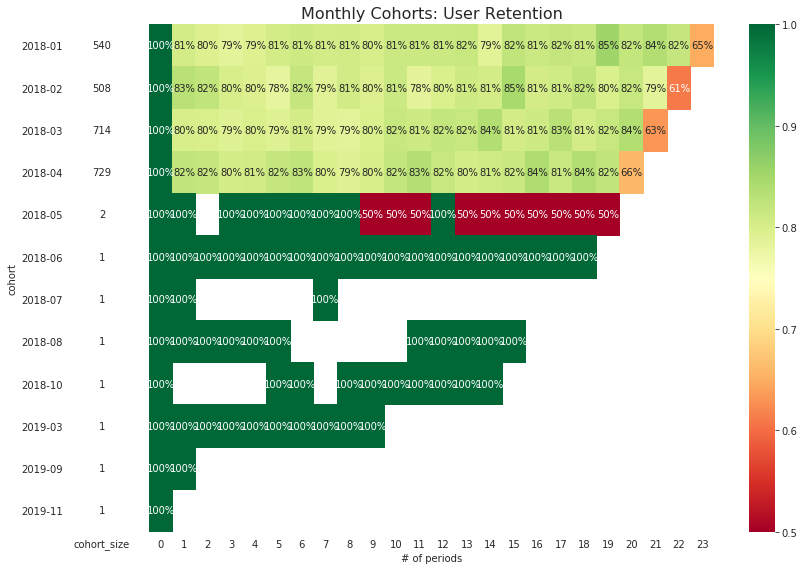

In [42]:
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

Reference: https://towardsdatascience.com/a-step-by-step-introduction-to-cohort-analysis-in-python-a2cbbd8460ea

## 7. MARKET BASKET ANALYSIS

In [100]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [101]:
products_sold = transaction_data.merge(product, on=['PRODUCT_ID'], how='left')
products_sold.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,dummy,basket_num,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0,1,1.0,69,PRODUCE,Private,POTATOES,POTATOES RUSSET (BULK&BAG),5 LB
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0,1,2.0,2,PRODUCE,National,ONIONS,ONIONS SWEET (BULK&BAG),40 LB
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0,1,3.0,69,PRODUCE,Private,VEGETABLES - ALL OTHERS,CELERY,
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0,1,4.0,2,PRODUCE,National,TROPICAL FRUIT,BANANAS,40 LB
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0,1,5.0,69,PRODUCE,Private,ORGANICS FRUIT & VEGETABLES,ORGANIC CARROTS,1 LB


Let's look at the top products sold 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

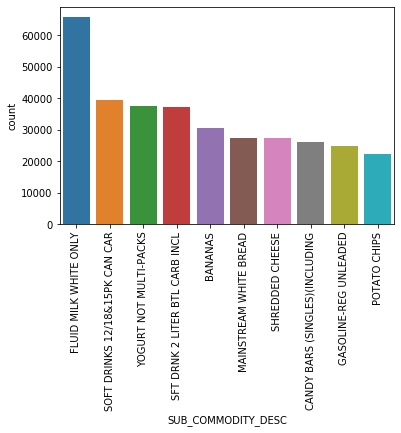

In [103]:
sns.countplot(x = 'SUB_COMMODITY_DESC', data = products_sold, order = products_sold['SUB_COMMODITY_DESC'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

### STEP 1: FREQUENT ITEMSET GENERATION

We now need to consolidate the items into 1 transaction per row with each product 1 hot encoded. 

In [107]:
basket = (products_sold
          .groupby(['BASKET_ID', 'SUB_COMMODITY_DESC'])['QUANTITY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BASKET_ID'))

In [ ]:
basket.head()

 We also need to make sure any positive values are converted to a 1 and anything less the 0 is set to 0. The below step will complete the one hot encoding of the data

In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

Next step is to generate frequent item sets that have a support of at least 1%

In [ ]:
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

The last step is to generate the rules with their corresponding support, confidence and lift

### STEP 2: RULE GENERATION

In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

We will filter the dataframe to look for itemsets with a good lift (1) and high confidence (.5). These product combinations can help to understand consumer purchase behaviour and further help the retailer to promote targeted campaigns or offers

In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

Reference: https://pythondata.com/market-basket-analysis-with-python-and-pandas/